In [118]:
##Reference - https://towardsdatascience.com/practical-statistics-visualization-with-python-plotly-770e96e35067
##Reference - https://eazybi.com/blog/data_visualization_and_chart_types
##Reference - https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(offline=True, world_readable=True, theme='White')
import plotly.graph_objs as go
##import plotly.plotly as py
import plotly
from plotly import tools
##plotly.tools.set_credentials_file(username='XXX', api_key='XXX')
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [34]:
df=pd.read_csv("WHO_roadtrafficdeaths.csv", skiprows=1)
df.tail(25)

,Country,Year,Drivers/passengers of 4-wheeled vehicles,Drivers/passengers of motorized 2- or 3-wheelers,Cyclists,Pedestrians,Other/unspecified road users
123,Sri Lanka,2016,NaN,50.8,8.1,28.6,5.7
124,Sudan,2016,33.8,NaN,NaN,14.9,71.4
125,Suriname,2016,53.7,45.9,4.1,15.6,1.4
126,Sweden,2016,34.7,16.3,8.1,NaN,6.3
127,Switzerland,2016,18.8,22.7,15.3,23.1,4.2
128,Syrian Arab Republic,2016,57.4h,6.4,5.9,64.7,4.2
129,Tajikistan,2016,12.3,NaN,2.3,40.3,0.0
130,Thailand,2016,46.6,74.4,3.5,7.6,2.3
131,Timor-Leste,2016,17.3,NaN,NaN,NaN,NaN
132,Togo,2016,66.7,71.6,NaN,NaN,11.1


In [35]:
#rename the indicator column
df.rename(columns={'Drivers/passengers of 4-wheeled vehicles' : '4wheeled_riders'}, inplace=True)
df.rename(columns={'Drivers/passengers of motorized 2- or 3-wheelers' : '3wheeled_riders'}, inplace=True)
df.rename(columns={'Other/unspecified road users' : 'Other'}, inplace=True)
df

,Country,Year,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
0,Albania,2016,39.4,11.9,7.8,38.7,2.2
1,Andorra,2013,NaN,50.0,NaN,50.0,NaN
2,Angola,2016,59.5,NaN,NaN,40.5,0.0
3,Antigua and Barbuda,2016,62.5,0.0,12.5,25.0,0.0
4,Argentina,2016,47.2,22.2,2.4,8.2,20.0
...,...,...,...,...,...,...,...
143,United States of America,2016,30.7,14.2,2.3,15.3,4.2
144,Uruguay,2016,NaN,45.7,7.0,16.6,0.0
145,Viet Nam,2016,52.2,NaN,NaN,NaN,NaN
146,Zambia,2013,48.4,NaN,11.6,36.4,NaN


In [38]:
##get the data type of each column
print(df.dtypes)

Country             object
Year                 int64
4wheeled_riders    float64
3wheeled_riders    float64
Cyclists           float64
Pedestrians        float64
Other              float64
dtype: object


In [37]:
df['4wheeled_riders'] = df['4wheeled_riders'].str.replace('h','')

df['4wheeled_riders'] = df['4wheeled_riders'].astype(float)
df.tail(25)


,Country,Year,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
123,Sri Lanka,2016,NaN,50.8,8.1,28.6,5.7
124,Sudan,2016,33.8,NaN,NaN,14.9,71.4
125,Suriname,2016,53.7,45.9,4.1,15.6,1.4
126,Sweden,2016,34.7,16.3,8.1,NaN,6.3
127,Switzerland,2016,18.8,22.7,15.3,23.1,4.2
128,Syrian Arab Republic,2016,57.4,6.4,5.9,64.7,4.2
129,Tajikistan,2016,12.3,NaN,2.3,40.3,0.0
130,Thailand,2016,46.6,74.4,3.5,7.6,2.3
131,Timor-Leste,2016,17.3,NaN,NaN,NaN,NaN
132,Togo,2016,66.7,71.6,NaN,NaN,11.1


In [40]:
##Replace all NaN values in all columns with 0.0
##col = df.select_dtypes(np.number).columns
d = {**dict.fromkeys(df.select_dtypes(np.number).columns, 0) }
df = df.fillna(d)

##df[col] = df[col].fillna(0)
##df['Numeric'].fillna(0.0,inplace=True)
df.tail(25)

,Country,Year,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
123,Sri Lanka,2016,0.0,50.8,8.1,28.6,5.7
124,Sudan,2016,33.8,0.0,0.0,14.9,71.4
125,Suriname,2016,53.7,45.9,4.1,15.6,1.4
126,Sweden,2016,34.7,16.3,8.1,0.0,6.3
127,Switzerland,2016,18.8,22.7,15.3,23.1,4.2
128,Syrian Arab Republic,2016,57.4,6.4,5.9,64.7,4.2
129,Tajikistan,2016,12.3,0.0,2.3,40.3,0.0
130,Thailand,2016,46.6,74.4,3.5,7.6,2.3
131,Timor-Leste,2016,17.3,0.0,0.0,0.0,0.0
132,Togo,2016,66.7,71.6,0.0,0.0,11.1


In [47]:
##summary stats of all columns
print(df.describe(include='all'))

         Country         Year  4wheeled_riders  3wheeled_riders    Cyclists  \
count        148   148.000000       148.000000       148.000000  148.000000   
unique       147          NaN              NaN              NaN         NaN   
top     Eswatini          NaN              NaN              NaN         NaN   
freq           2          NaN              NaN              NaN         NaN   
mean         NaN  2015.817568        35.704730        17.961486    4.758784   
std          NaN     0.719383        21.353173        19.418185    6.579022   
min          NaN  2013.000000         0.000000         0.000000    0.000000   
25%          NaN  2016.000000        18.125000         2.075000    0.375000   
50%          NaN  2016.000000        40.150000        13.200000    2.600000   
75%          NaN  2016.000000        52.125000        22.700000    7.150000   
max          NaN  2016.000000        75.000000        80.000000   60.000000   

        Pedestrians       Other  
count    148.0000

In [48]:
##another way to calculate mean of a column
print(df['4wheeled_riders'].mean())

35.70472972972972


In [50]:
#summary for multiple columns
df[["Pedestrians", "Other"]].median()

Pedestrians    24.75
Other           5.45
dtype: float64

In [51]:
#specific stats for specific columns
df.agg({'4wheeled_riders': ['min', 'max', 'median', 'skew'],
                '3wheeled_riders': ['min', 'max', 'median', 'mean']})

,4wheeled_riders,3wheeled_riders
max,75.000000,80.000000
mean,NaN,17.961486
median,40.150000,13.200000
min,0.000000,0.000000
skew,-0.290036,NaN


In [52]:
#summary stats by year
df.groupby("Year").mean()

,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
Year,,,,,
2013,31.588889,19.011111,3.188889,39.155556,1.388889
2016,35.971223,17.893525,4.860432,23.995683,10.464029


In [70]:
##filter the records for a certain year
df1 = df.loc[df['Year'] == 2016]
df1.reset_index()
df1

,Country,Year,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
0,Albania,2016,39.4,11.9,7.8,38.7,2.2
2,Angola,2016,59.5,0.0,0.0,40.5,0.0
3,Antigua and Barbuda,2016,62.5,0.0,12.5,25.0,0.0
4,Argentina,2016,47.2,22.2,2.4,8.2,20.0
5,Armenia,2016,59.6,1.5,0.4,34.8,3.7
...,...,...,...,...,...,...,...
142,United Republic of Tanzania,2016,63.9,22.7,8.0,29.9,0.8
143,United States of America,2016,30.7,14.2,2.3,15.3,4.2
144,Uruguay,2016,0.0,45.7,7.0,16.6,0.0
145,Viet Nam,2016,52.2,0.0,0.0,0.0,0.0


In [68]:
#calculate weighted mean to the dataset
y = np.random.randn(5)
df2 = df1[['4wheeled_riders','3wheeled_riders','Cyclists','Pedestrians','Other']]
df2*y

,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
0,29.359363,4.115841,8.865124,17.960562,2.168647
2,44.337109,0.000000,0.000000,18.795937,0.000000
3,46.572594,0.000000,14.206930,11.602430,0.000000
4,35.171623,7.678291,2.727731,3.805597,19.714969
5,44.411625,0.518803,0.454622,16.150583,3.647269
...,...,...,...,...,...
142,47.615820,7.851225,9.092435,13.876506,0.788599
143,22.876458,4.911339,2.614075,7.100687,4.140143
144,0.000000,15.806211,7.955881,7.704014,0.000000
145,38.897430,0.000000,0.000000,0.000000,0.000000


In [74]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
4wheeled_riders,139.0,35.971223,21.044292,0.0,18.30,40.3,51.95,75.0
3wheeled_riders,139.0,17.893525,19.159881,0.0,2.20,14.2,22.45,80.0
Cyclists,139.0,4.860432,6.710198,0.0,0.50,2.7,7.45,60.0
Pedestrians,139.0,23.995683,13.392518,0.0,15.30,24.6,33.15,64.7
Other,139.0,10.464029,16.036801,0.0,0.95,5.9,10.90,93.9


In [109]:
df['4wheeled_riders'].iplot(
    kind='hist',
    bins=5,
    xTitle='Distribution of road traffic deaths by type of road user',
    linecolor='green',
    yTitle='count',
    title='Histogram of 4 wheeled drivers')

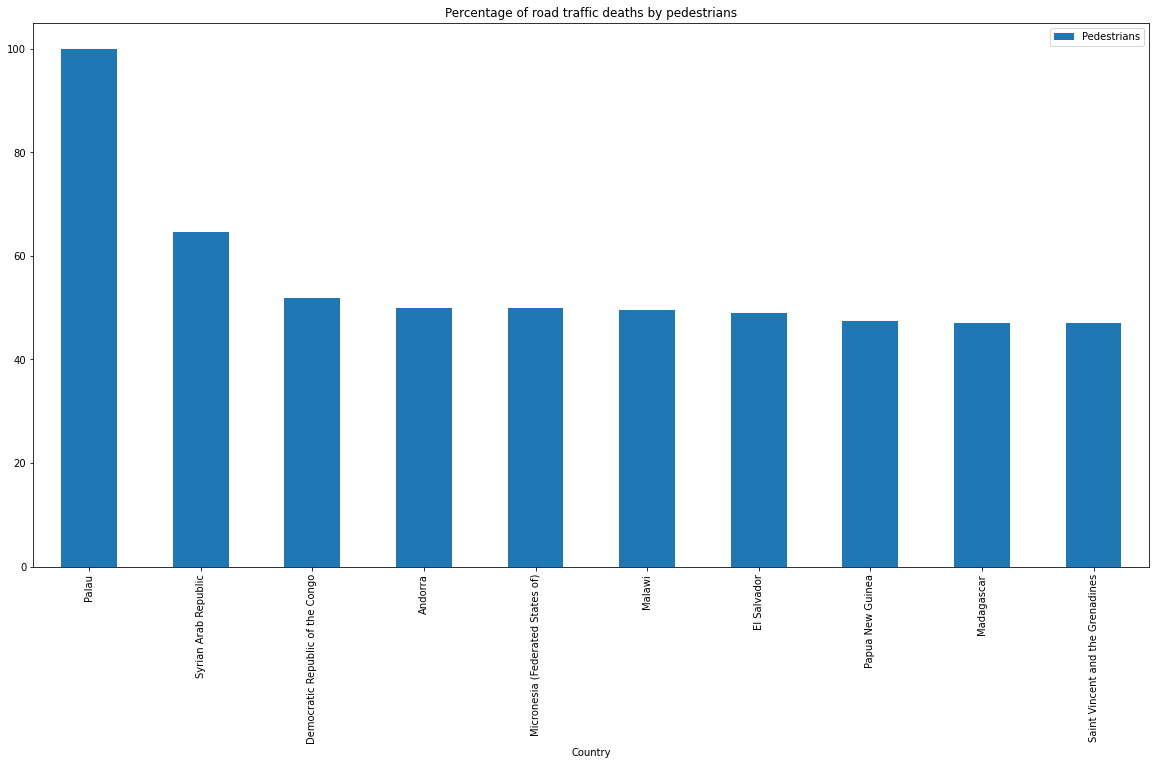

In [133]:
##df.sort_values('Pedestrians',ascending=0)[:10].plot(kind='bar')

df1 = df.sort_values('Pedestrians', ascending=False).head(10)
df1.plot(x ='Country', y='Pedestrians', kind = 'bar', title='Percentage of road traffic deaths by pedestrians',
              sort_columns='Pedestrians'   , figsize=(20,10))
plt.show()

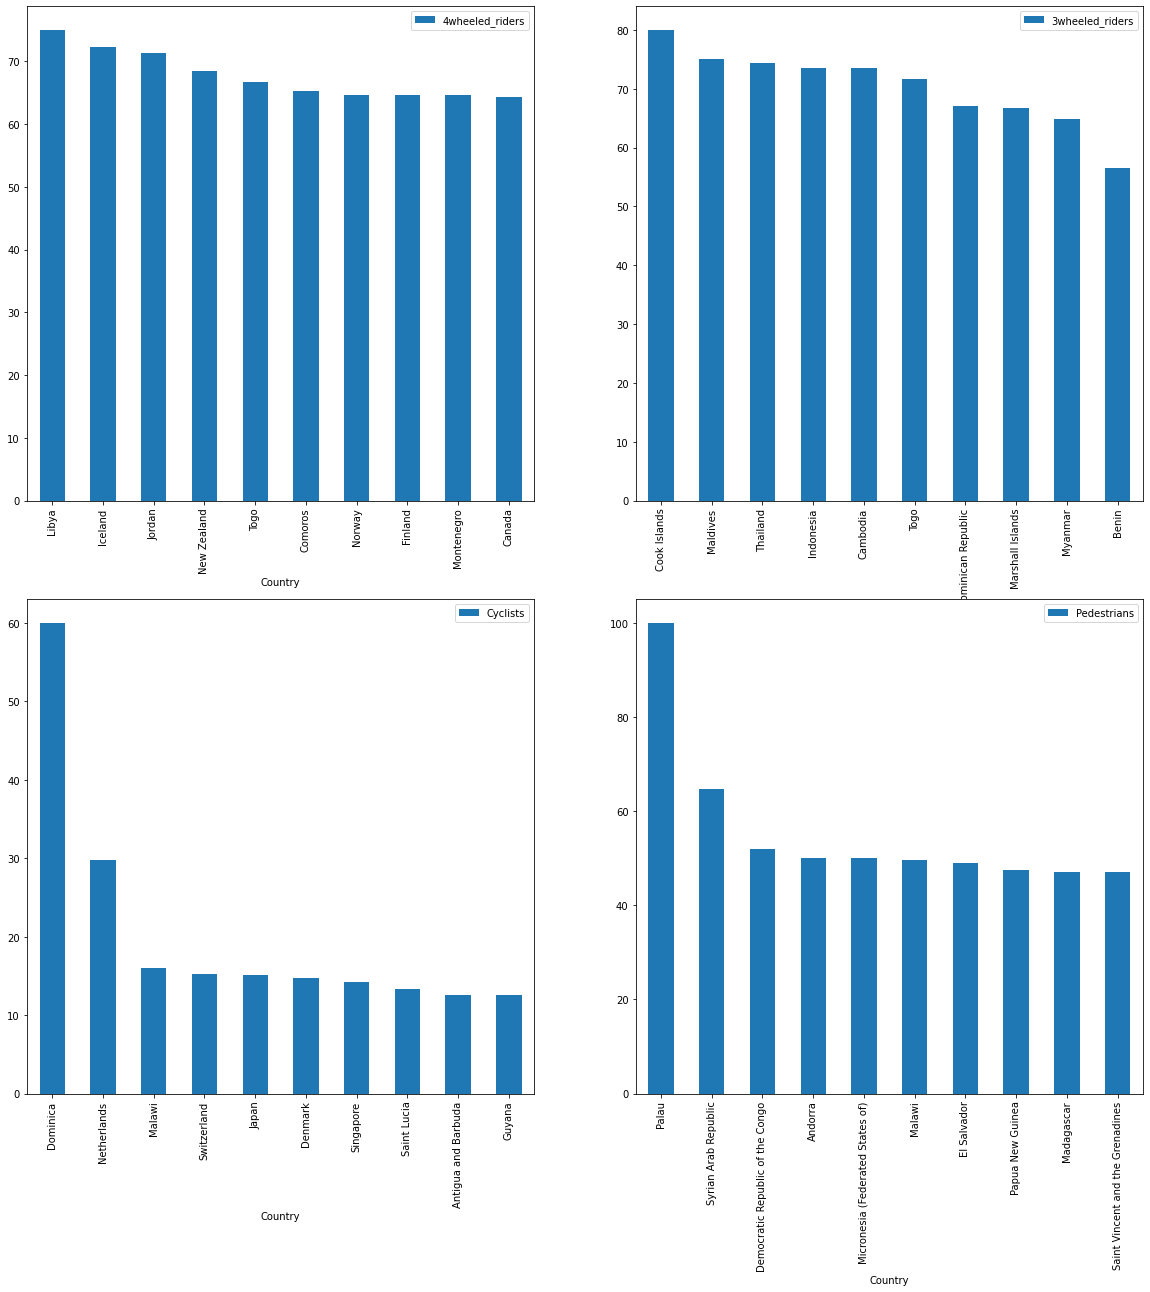

In [143]:
df1 = df.sort_values('4wheeled_riders', ascending=False).head(10)
df2 = df.sort_values('3wheeled_riders', ascending=False).head(10)
df3 = df.sort_values('Cyclists', ascending=False).head(10)
df4 = df.sort_values('Pedestrians', ascending=False).head(10)

##4 subplots 
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

df1.plot(x ='Country', y='4wheeled_riders', kind = 'bar', 
              sort_columns='4wheeled_riders'   , ax=axes[0,0])
df2.plot(x ='Country', y='3wheeled_riders', kind = 'bar',
              sort_columns='3wheeled_riders'   , ax=axes[0,1])
df3.plot(x ='Country', y='Cyclists', kind = 'bar',
              sort_columns='Cyclists'   , ax=axes[1,0])
df4.plot(x ='Country', y='Pedestrians', kind = 'bar',
              sort_columns='Pedestrians'   , ax=axes[1,1])


plt.show()

##df1.plot(ax=axes[0,0])
##df2.plot(ax=axes[0,1])


In [144]:
df.index.name='C1'
df.index.name
##df.index

'C1'

In [181]:
df5=df.iloc[0:40,[0,2,3,4,5,6]]
df5
df6=df.iloc[41:80,[0,2,3,4,5,6]]
df6
df7=df.iloc[81:120,[0,2,3,4,5,6]]
df7
df8=df.iloc[120:,[0,2,3,4,5,6]]
df8

,Country,4wheeled_riders,3wheeled_riders,Cyclists,Pedestrians,Other
C1,,,,,,
120,South Africa,0.0,0.3,3.2,0.0,13.1
121,South Sudan,46.5,0.0,0.0,21.5,0.0
122,Spain,6.2,21.9,3.7,29.2,6.4
123,Sri Lanka,0.0,50.8,8.1,28.6,5.7
124,Sudan,33.8,0.0,0.0,14.9,71.4
125,Suriname,53.7,45.9,4.1,15.6,1.4
126,Sweden,34.7,16.3,8.1,0.0,6.3
127,Switzerland,18.8,22.7,15.3,23.1,4.2
128,Syrian Arab Republic,57.4,6.4,5.9,64.7,4.2


Text(0, 0.5, '')

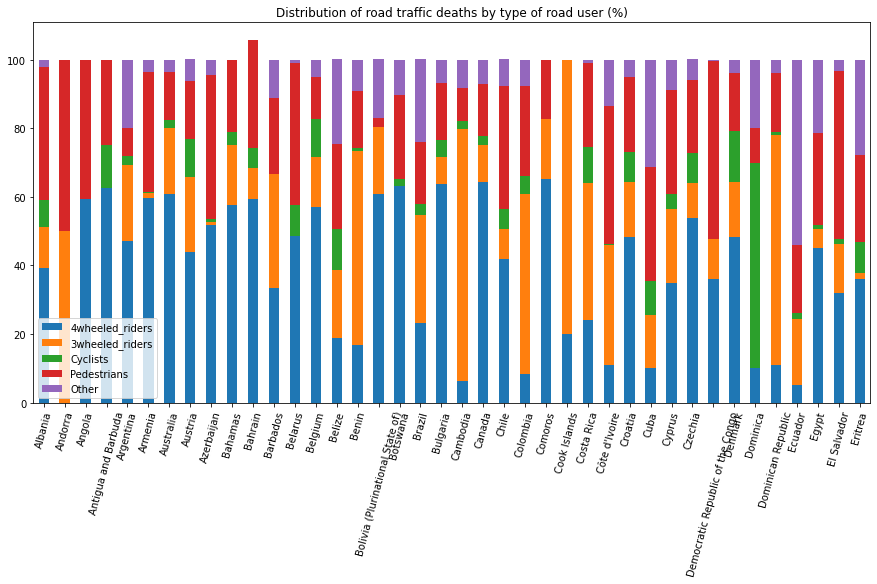

In [190]:
ax = df5.plot(kind="bar", stacked=True,figsize=(15,7))
plt.title("Distribution of road traffic deaths by type of road user (%)")
ax.set_xticklabels(df5['Country'], rotation=75)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

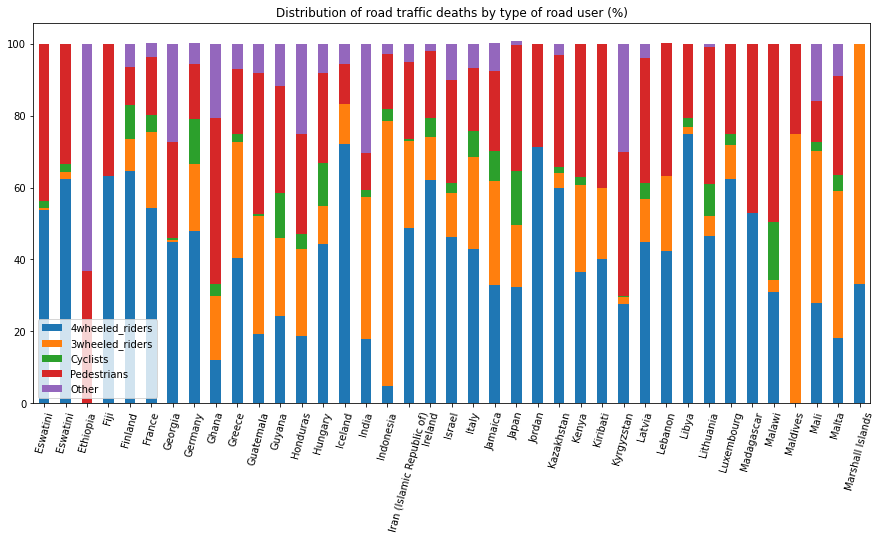

In [191]:
ax = df6.plot(kind="bar", stacked=True,figsize=(15,7))
plt.title("Distribution of road traffic deaths by type of road user (%)")
ax.set_xticklabels(df6['Country'], rotation=75)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

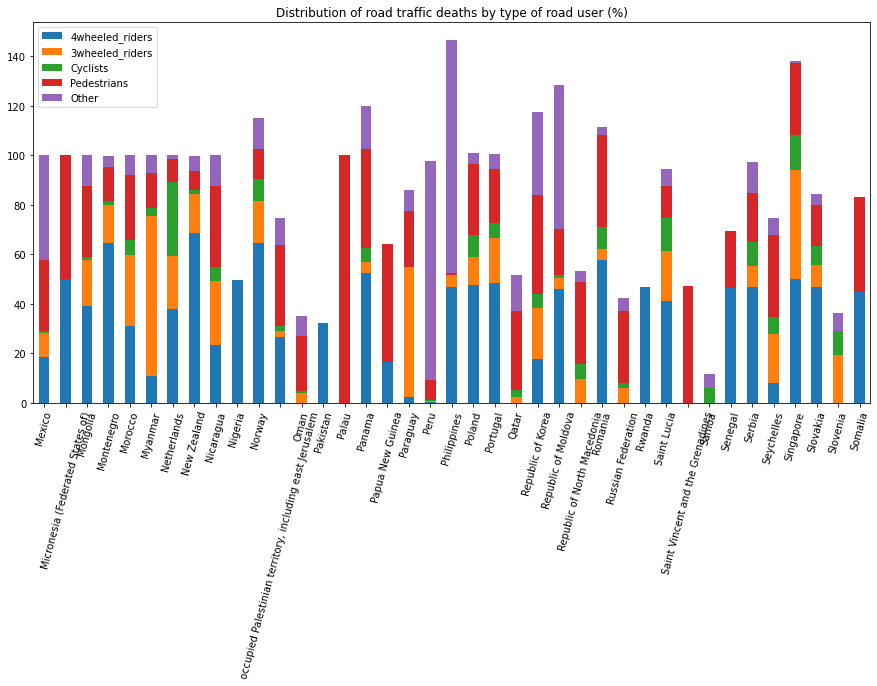

In [189]:
ax = df7.plot(kind="bar", stacked=True,figsize=(15,7))
plt.title("Distribution of road traffic deaths by type of road user (%)")
ax.set_xticklabels(df7['Country'], rotation=75)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

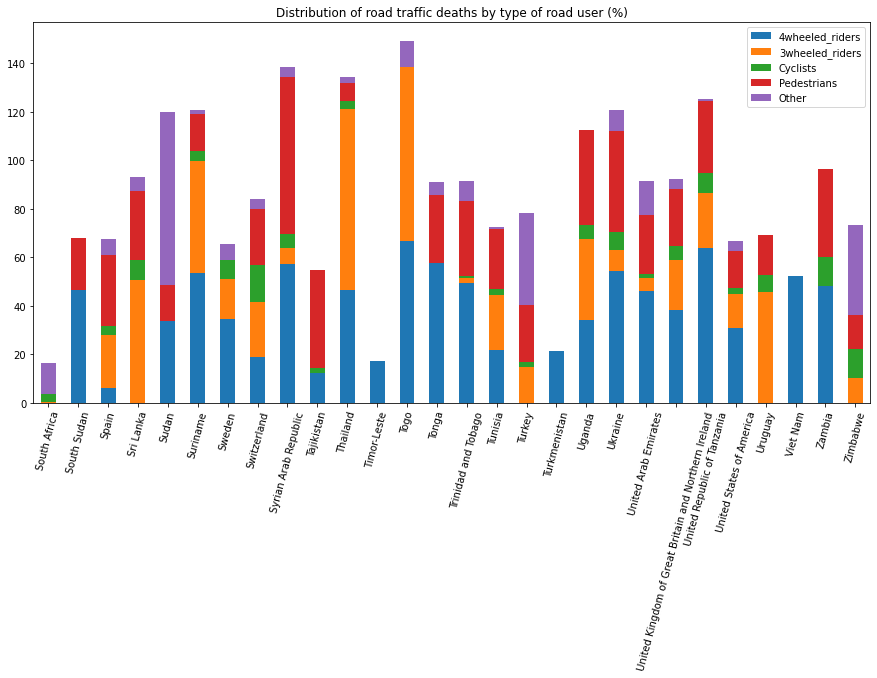

In [188]:
ax = df8.plot(kind="bar", stacked=True,figsize=(15,7))
plt.title("Distribution of road traffic deaths by type of road user (%)")
ax.set_xticklabels(df8['Country'], rotation=75)
plt.xlabel("")
plt.ylabel("")

The data suggests that Palau has the most number of pedestrian deaths. It also suggests that the Cook Islands has the most number of deaths in the 3 wheeler category.
Missing data and invalid data seems to be a major issue with this dataset. 4 wheeled data seems to be the only data point for Turkmenistan.
Cyclists are the least popular road users. ;-) I wonder what all road users fall under "Others".
